# Hands-on Image Processing with Python
## Chapter 9: Classical Machine Learning Methods in Image Processing

### Author: Sandipan Dey

### Dimension reduction and visualization with PCA

(1797, 64)


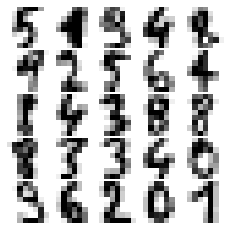

In [ ]:
% matplotlib inline
import numpy as np
import matplotlib.pylab as plt 
from sklearn.datasets import load_digits 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import pylab

# Loading a dataset from sklearn
digits = load_digits() 
#print(digits.keys())
print(digits.data.shape)
j = 1

# random.seed makes the random numbers predictable (getting the same numbers everytime)
np.random.seed(1)

# Adjusting the figure's specifications
fig = plt.figure(figsize=(3,3)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 

# np.random.choice will return 25 random values from o up to digits.data.shape[0], which is the number of images in the dataset
# This loop will iterate over 25 random images from the dataset (will return the same images everytime because of the seed)
for i in np.random.choice(digits.data.shape[0], 25):  

    # Just plotting the current image, after reshaping the 64 pixels into 8*8, and removing the axes
    plt.subplot(5,5,j), plt.imshow(np.reshape(digits.data[i,:], (8,8)), cmap='binary'), plt.axis('off')
    j += 1
plt.show()

In [ ]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

- The dataset has 64 features (8*8 pixels) and 1797 rows (1797 images)
- The previous code just visualizes the dataset

0.28509364823697003


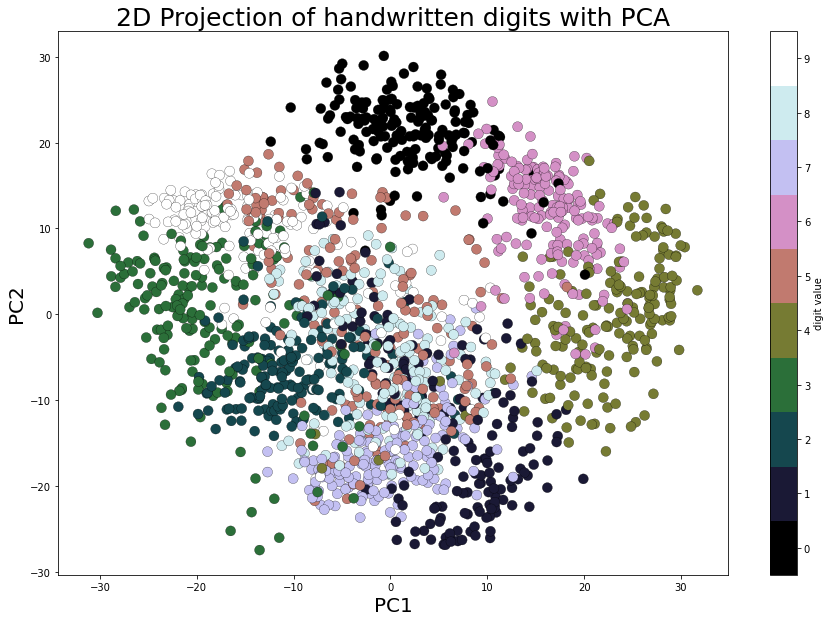

In [ ]:
# Principal component analysis with number of components = 2
pca_digits=PCA(2)

# Fit the model with digits.data and apply the dimensionality reduction on it.
digits.data_proj = pca_digits.fit_transform(digits.data) 

# Computing and printing the sum of the percentages of variance explained by each of the selected components.
print(np.sum(pca_digits.explained_variance_ratio_))

plt.figure(figsize=(15,10))
# Scatterplot that shows the relation between the data and each of the selected prinicpal components
plt.scatter(digits.data_proj[:, 0], digits.data_proj[:, 1], lw=0.25, c=digits.target, edgecolor='k',  s=100, cmap=plt.cm.get_cmap('cubehelix', 10))

# Adjusting the figure's specifications
plt.xlabel('PC1', size=20), plt.ylabel('PC2', size=20), plt.title('2D Projection of handwritten digits with PCA', size=25)
plt.colorbar(ticks=range(10), label='digit value')
plt.clim(-0.5, 9.5)

* The sum of the percentages of explained variance seems to be relatively small, which means that more principal components are needed.

### Eigenfaces with PCA

(400, 4096)


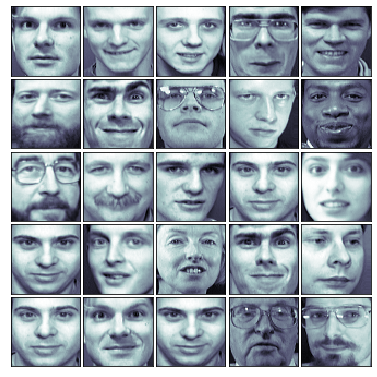

In [ ]:
from sklearn.datasets import fetch_olivetti_faces 

# Load the Olivetti faces dataset
faces = fetch_olivetti_faces().data
print(faces.shape) # there are 400 faces each of them is of 64x64=4096 pixels

# Adjusting the figure's specifications
fig = plt.figure(figsize=(5,5)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 

# plot 25 random faces
j = 1

# random.seed makes the random numbers predictable (getting the same numbers everytime)
np.random.seed(0)

# np.random.choice will return 25 random values from o up to faces.shape[0], which is the number of faces in the dataset
# This loop will iterate over 25 random faces from the dataset (will return the same images everytime because of the seed)
for i in np.random.choice(range(faces.shape[0]), 25): 
    ax = fig.add_subplot(5, 5, j, xticks=[], yticks=[]) 

    # Just plotting the current face, after reshaping the 4096 pixels into 64*64 and colormap = bone (gray)
    ax.imshow(np.reshape(faces[i,:],(64,64)), cmap=plt.cm.bone, interpolation='nearest') 
    j += 1
plt.show()

(400, 64)


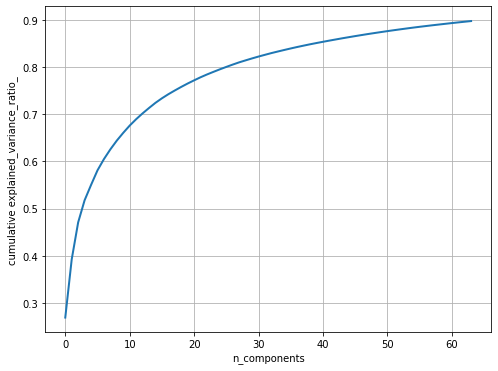

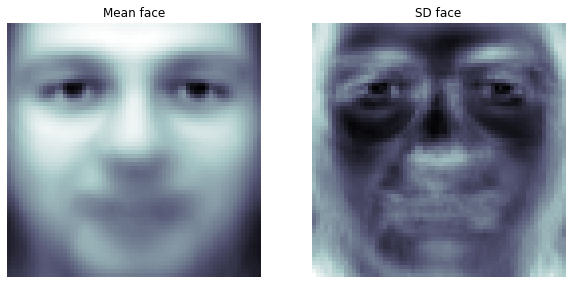

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
n_comp =64

# Sequentially apply a list of transforms and a final estimator
# The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.
# This will apply scaling (standardization) then PCA with 64 components
pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=n_comp))])
faces_proj = pipeline.fit_transform(faces)
print(faces_proj.shape)
# (400, 64)

# Retrieving the mean face and standard deviation face
mean_face = np.reshape(pipeline.named_steps['scaling'].mean_, (64,64))
sd_face = np.reshape(np.sqrt(pipeline.named_steps['scaling'].var_), (64,64))

# Plotting the number of components vs cumulative explained_variance_ratio_ 
pylab.figure(figsize=(8, 6))
pylab.plot(np.cumsum(pipeline.named_steps['pca'].explained_variance_ratio_), linewidth=2)

# Adjusting the figure's specifications
pylab.grid(), pylab.axis('tight'), pylab.xlabel('n_components'), pylab.ylabel('cumulative explained_variance_ratio_')
pylab.show()

# Plotting the mean and standard deviation faces without axes
pylab.figure(figsize=(10,5))
pylab.subplot(121), pylab.imshow(mean_face, cmap=pylab.cm.bone), pylab.axis('off'), pylab.title('Mean face')
pylab.subplot(122), pylab.imshow(sd_face, cmap=pylab.cm.bone), pylab.axis('off'), pylab.title('SD face')
pylab.show()

* The cumulative explained variance increases as the principal components increase, and approach 0.9 with 64 components only which is satisfying. 

* Reducing the features from 4096 to 64 and losing approximately 0.1 variance is amazing! 

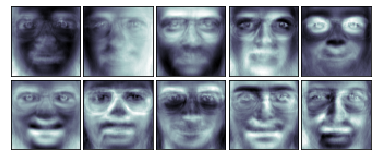

In [ ]:
# Adjusting the figure's specifications
fig = plt.figure(figsize=(5,2)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 

# plot the first 10 eigenfaces
for i in range(10): 
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[]) 
    
    # Just plotting the current face where colormap = bone (gray)
    ax.imshow(np.reshape(pipeline.named_steps['pca'].components_[i,:], (64,64)), cmap=plt.cm.bone, interpolation='nearest')

* The faces still look like faces as they still have the face features. In other words, we can distinguish the eyebrows, eyes, nose, mouth, moustache and even sunglasses. However, we may not be able to distinguish that specific person or his/her gender. Also, they look very creepy.

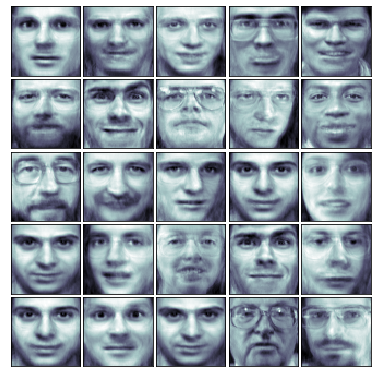

In [ ]:
# face reconstruction
faces_inv_proj = pipeline.named_steps['pca'].inverse_transform(faces_proj) 
#reshaping as 400 images of 64x64 dimension 
fig = plt.figure(figsize=(5,5)) 
# Adjusting the figure's specifications
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
# plot the faces, each image is 64 by 64 dimension but 8x8 pixels 
j = 1

# np.random.choice will return 25 random values from o up to faces.shape[0], which is the number of faces in the dataset
# This loop will iterate over 25 random faces from the dataset (will return the same images everytime because of the seed)
np.random.seed(0)
for i in np.random.choice(range(faces.shape[0]), 25): 
    ax = fig.add_subplot(5, 5, j, xticks=[], yticks=[]) 
    
    # Just plotting the current face, after reshaping the 4096 dimension into 64*64 dimension,
    # then multiplying by the standard deviation face and adding the mean face
    # and colormap = bone (gray)
    ax.imshow(mean_face + sd_face*np.reshape(faces_inv_proj,(400,64,64)) [i,:], cmap=plt.cm.bone, interpolation='nearest')
    j += 1

* The faces are much clear. All face features are clear and it is somehow clear whether the face belongs to a male or a female.

(64,)
(64, 4096)


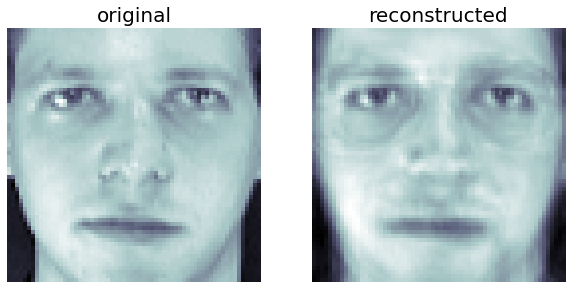

In [ ]:
print(faces_proj[0,:].shape)
print(pipeline.named_steps['pca'].components_.shape)

# Retrieving the first original face by reshaping, multiplying by the standard deviation face and adding the mean face
orig_face = np.reshape(faces[0,:], (64,64))
reconst_face = np.reshape(faces_proj[0,:]@pipeline.named_steps['pca'].components_, (64,64))
reconst_face = mean_face + sd_face*reconst_face

# Plotting the original and reconstructed face
plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(orig_face, cmap=plt.cm.bone, interpolation='nearest'), plt.axis('off'), plt.title('original', size=20)
plt.subplot(122), plt.imshow(reconst_face, cmap=plt.cm.bone, interpolation='nearest'), plt.axis('off'), plt.title('reconstructed', size=20)
plt.show()

* The reconstructed face and the original one are much alike. It seems that we did not lose much information. That specific person can be determined from the reconstructed face, which is really cool as we decreased the features by 64 times!